In [ ]:
import cv2
import numpy as np

image_path = "image1.webp"
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if len(image.shape) == 2:  
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)

k = 3  # Number of clusters (you can increase if needed)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

labels = labels.reshape(image.shape[:2])

unique, counts = np.unique(labels, return_counts=True)
bg_label = unique[np.argmax(counts)]
mask = np.where(labels == bg_label, 0, 255).astype(np.uint8)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
b, g, r = cv2.split(image)
alpha = mask
segmented = cv2.merge((b, g, r, alpha))

cv2.imwrite("jewellery_segment1.png", segmented)
print("Segmented image saved as jewellery_segmented.png")


Segmented image saved as jewellery_segmented.png


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


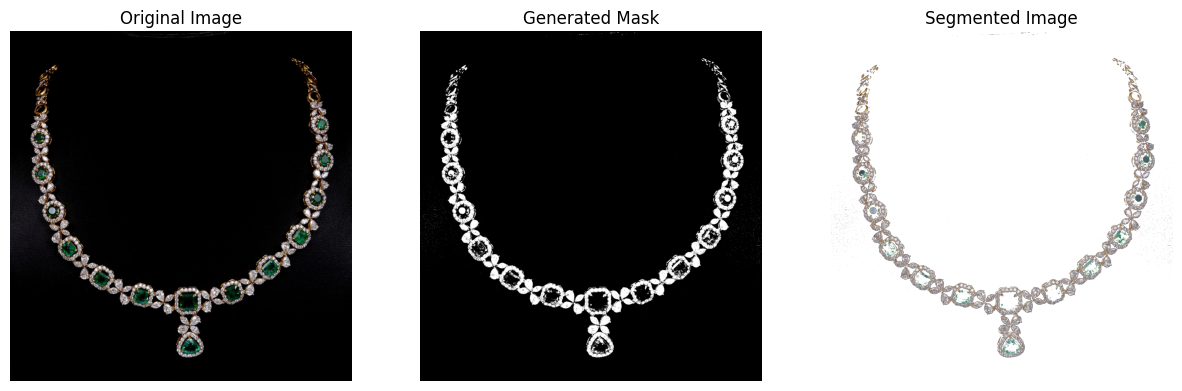

True

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_jewellery(image_path):
    """
    Segments jewellery from an image using K-Means clustering.

    Parameters:
    - image_path (str): Path to the input image.

    Returns:
    - original (numpy array): Original image in RGB format.
    - mask (numpy array): Binary mask where jewellery is separated.
    - segmented (numpy array): Jewellery image with transparent background.
    """
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    print(image)
    if len(image.shape) == 2:  
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape image for clustering
    pixels = image_rgb.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-Means clustering
    k = 3
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert labels into a mask
    labels = labels.reshape(image_rgb.shape[:2])
    unique, counts = np.unique(labels, return_counts=True)
    bg_label = unique[np.argmax(counts)]

    # Create binary mask
    mask = np.where(labels == bg_label, 0, 255).astype(np.uint8)

    # Apply mask to the original image
    b, g, r = cv2.split(image_rgb)
    alpha = mask  # Use stored mask as alpha channel
    segmented = cv2.merge((b, g, r, alpha))

    return image_rgb, mask, segmented


image_path = "test2.jpg"
original, mask, segmented = segment_jewellery(image_path)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Generated Mask")
axes[1].axis("off")

axes[2].imshow(segmented)
axes[2].set_title("Segmented Image")
axes[2].axis("off")

plt.show()
cv2.imwrite("jewellery_segment1.png", cv2.cvtColor(segmented, cv2.COLOR_RGBA2BGRA))